In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import math
from scipy import optimize
import scipy.stats as stats
from scipy.stats import norm


# 1 Data Preprocessing

In [2]:
df = pd.read_excel('closing_price.xlsx')
time = df['Bloomberg Ticker']
data = df['AAPL UW Equity']
# time,data

In [3]:
apple_price = data.values
# apple_price

In [4]:
x = [(apple_price[i]-apple_price[i-1])/apple_price[i-1] for i in range(1, apple_price.shape[0])]
# x

In [5]:
learning_set_x = x[:len(x)*3//4]
testing_set_x  = x[len(x)*3//4:]
# len(learning_set_x),len(testing_set_x)

In [6]:
epsilon = np.mean(learning_set_x)
# epsilon

In [7]:
d = ['D' if i < -epsilon else 'U' if i > epsilon else 'H' for i in x]
# d

In [8]:
learning_set = apple_price[:len(apple_price)*3//4]
testing_set  = apple_price[len(apple_price)*3//4:]
# len(learning_set),len(testing_set)

# 2 Cumulative Distribution Function

In [40]:
Ux = sorted([learning_set_x[i] for i in range(len(learning_set_x)-1) if d[i+1] == 'U'])
Dx = sorted([learning_set_x[i] for i in range(len(learning_set_x)-1) if d[i+1] == 'D'])

In [10]:
FU = sorted(Ux)
val, cnt = np.unique(Ux, return_counts=True)
pmf = cnt/len(Ux)
FU_rv_discrete = stats.rv_discrete(name='fs_rv_dist', values=(val, pmf))

Text(0.5, 1.0, 'CDF $F_U(x)$')

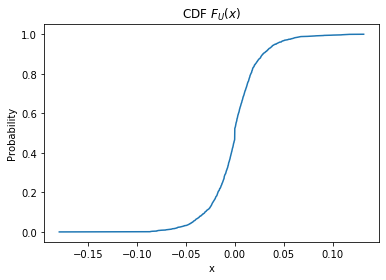

In [12]:
plt.plot(val, FU_rv_discrete.cdf(val), '-')
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('CDF $F_U(x)$')

In [13]:
FD = sorted(Dx)
val, cnt = np.unique(Dx, return_counts=True)
pmf = cnt/len(Dx)
FD_rv_discrete = stats.rv_discrete(name='fs_rv_dist', values=(val, pmf))

Text(0.5, 1.0, 'CDF $F_D(x)$')

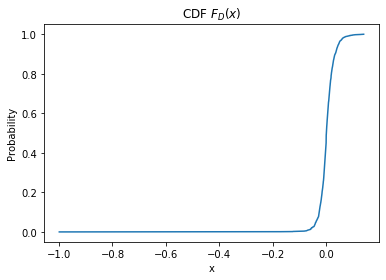

In [14]:
plt.plot(val, FD_rv_discrete.cdf(val), '-')
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('CDF $F_D(x)$')

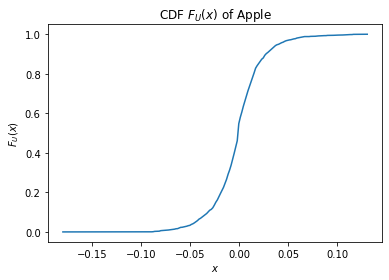

In [15]:
count,low,binsize,_=stats.cumfreq(Ux, numbins=200)
cdf_U_x=[]
cdf_U_x.append(low)
for i in range(1,200):
    cdf_U_x.append(cdf_U_x[i-1]+binsize)
cdf_U=[]
for i in range(200):
    cdf_U.append(count[i]/len(Ux))

# plt.figure(figsize=(12,8))
plt.plot(cdf_U_x,cdf_U)
plt.title('CDF $F_U(x)$ of Apple')
plt.ylabel('$F_U(x)$')
plt.xlabel('$x$')
plt.savefig('FU(x)')
plt.show()

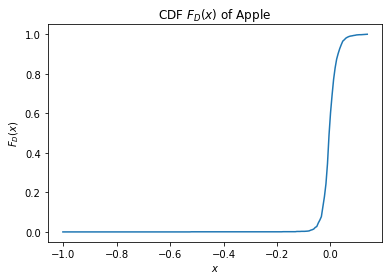

In [16]:
count,low,binsize,_=stats.cumfreq(Dx, numbins=200)
cdf_D_x=[]
cdf_D_x.append(low)
for i in range(1,200):
    cdf_D_x.append(cdf_D_x[i-1]+binsize)
cdf_D=[]
for i in range(200):
    cdf_D.append(count[i]/len(Dx))

# plt.figure(figsize=(12,8))
plt.plot(cdf_D_x,cdf_D)
plt.title('CDF $F_D(x)$ of Apple')
plt.ylabel('$F_D(x)$')
plt.xlabel('$x$')
plt.savefig('FD(x)')
plt.show()

# 3.Probability Density Function

In [32]:
def FD_distribution(x, b, x0):
    return 1/(1+np.exp(-b*(x-x0)))

In [61]:
b_U, x0_U = optimize.curve_fit(FD_distribution, cdf_U_x, cdf_U)[0]
b_D, x0_D = optimize.curve_fit(FD_distribution, cdf_D_x, cdf_D)[0]
# b_U, x0_U, b_D, x0_D

In [38]:
FU_FDFit = [FD_distribution(x, b_U, x0_U) for x in cdf_U_x]
FD_FDFit = [FD_distribution(x, b_D, x0_D) for x in cdf_D_x]

In [55]:
def fD_distribution(x, b, x0):
    return (b*np.exp(-b*(x-x0)))/(1+np.exp(-b*(x-x0)))**2

In [82]:
fU_FDFit = [fD_distribution(x, b_U, x0_U) for x in cdf_U_x]
fD_FDFit = [fD_distribution(x, b_D, x0_D) for x in cdf_D_x]

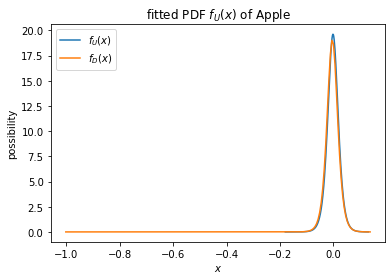

In [85]:
plt.plot(cdf_U_x, fU_FDFit, label="$f_U(x)$")
plt.plot(cdf_D_x, fD_FDFit, label="$f_D(x)$")
plt.title('fitted PDF $f_U(x)$ of Apple')
plt.ylabel('possibility')
plt.xlabel('$x$')
plt.legend()
# plt.savefig('FU(x) fitted')
plt.show()

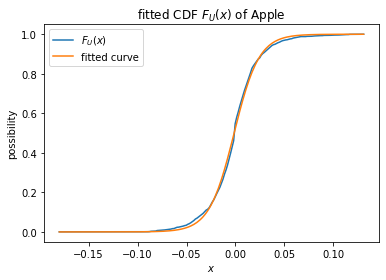

In [36]:
plt.plot(cdf_U_x,cdf_U,label="$F_U(x)$")
plt.plot(cdf_U_x,F_U,label="fitted curve")
plt.title('fitted CDF $F_U(x)$ of Apple')
plt.ylabel('possibility')
plt.xlabel('$x$')
plt.legend()
plt.savefig('FU(x) fitted')
plt.show()

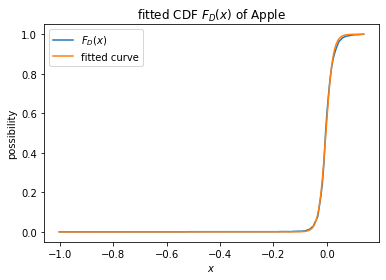

In [20]:
plt.plot(cdf_D_x,cdf_D,label="$F_D(x)$")
plt.plot(cdf_D_x,F_D,label="fitted curve")
plt.title('fitted CDF $F_D(x)$ of Apple')
plt.ylabel('possibility')
plt.xlabel('$x$')
plt.legend()
plt.savefig('FD(x) fitted')
plt.show()

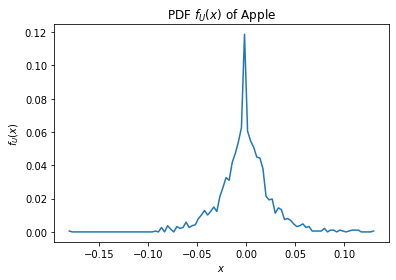

In [21]:
count,low,binsize,_=stats.relfreq(Ux, numbins=100)
pdf_U_x=[]
pdf_U_x.append(low)
for i in range(1,100):
    pdf_U_x.append(pdf_U_x[i-1]+binsize)
pdf_U=[]
for i in range(100):
    pdf_U.append(count[i])

# plt.figure(figsize=(12,8))
plt.plot(pdf_U_x,pdf_U)
plt.title('PDF $f_U(x)$ of Apple')
plt.ylabel('$f_U(x)$')
plt.xlabel('$x$')
plt.savefig('fU(x)')
plt.show()

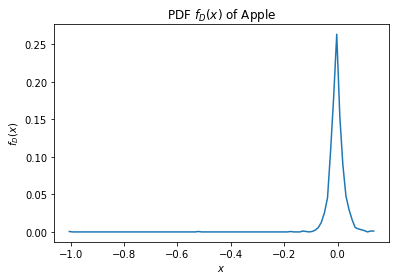

In [22]:
count,low,binsize,_=stats.relfreq(Dx, numbins=100)
pdf_D_x=[]
pdf_D_x.append(low)
for i in range(1,100):
    pdf_D_x.append(pdf_D_x[i-1]+binsize)
pdf_D=[]
for i in range(100):
    pdf_D.append(count[i])

plt.plot(pdf_D_x,pdf_D)
plt.title('PDF $f_D(x)$ of Apple')
plt.ylabel('$f_D(x)$')
plt.xlabel('$x$')
plt.savefig('fD(x)')
plt.show()

In [62]:
def Gaussian_distribution(x, mu, sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)

In [65]:
mean_U = np.mean(Ux)
std_U  = np.sqrt(sum((Ux-mean_U)**2)/len(Ux))

In [66]:
mean_D = np.mean(Dx)
std_D  = np.sqrt(sum((Dx-mean_D)**2)/len(Dx))

In [67]:
mean_U, std_U, mean_D, std_D

(0.00015791983425833504,
 0.026259899575427015,
 0.001900384849612306,
 0.037892759755862794)

In [86]:
gU_GaussianFit = [Gaussian_distribution(x, mean_U, std_U) for x in cdf_U_x]
gD_GaussianFit = [Gaussian_distribution(x, mean_D, std_D) for x in cdf_D_x]
# for i in pdf_U_x:
#     f_U.append(Gaussian_distribution(i,0.01, 0.01901651014487778))
# f_D=[]
# for i in pdf_D_x:
#     f_D.append(Gaussian_distribution(i,0.01, 0.0377667340197279))

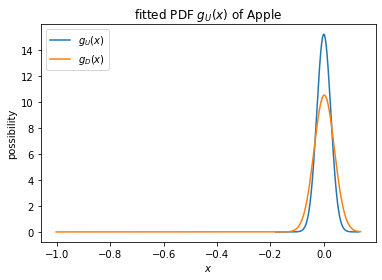

In [87]:
plt.plot(cdf_U_x, gU_GaussianFit, label="$g_U(x)$")
plt.plot(cdf_D_x, gD_GaussianFit, label="$g_D(x)$")
plt.title('fitted PDF $g_U(x)$ of Apple')
plt.ylabel('possibility')
plt.xlabel('$x$')
plt.legend()
# plt.savefig('fU(x) fitted.png')
plt.show()

In [88]:
parameters = norm.fit(pdf_U)
f_U = norm.pdf(pdf_U_x, loc = parameters[0], scale = parameters[1])/len(pdf_U_x)
parameters = norm.fit(pdf_D)
f_D = norm.pdf(pdf_D_x, loc = parameters[0], scale = parameters[1])/len(pdf_D_x)

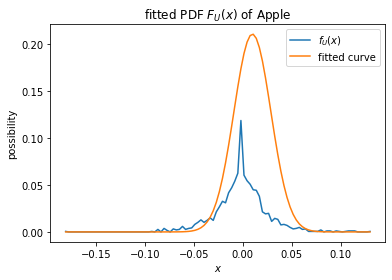

In [89]:
plt.plot(pdf_U_x,pdf_U,label="$f_U(x)$")
plt.plot(pdf_U_x,f_U,label="fitted curve")
plt.title('fitted PDF $F_U(x)$ of Apple')
plt.ylabel('possibility')
plt.xlabel('$x$')
plt.legend()
plt.savefig('fU(x) fitted.png')
plt.show()

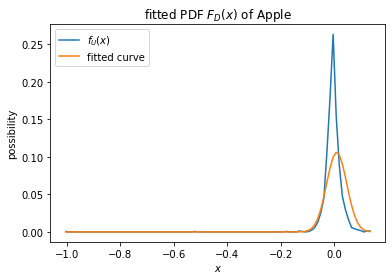

In [90]:
plt.plot(pdf_D_x,pdf_D,label="$f_U(x)$")
plt.plot(pdf_D_x,f_D,label="fitted curve")
plt.title('fitted PDF $F_D(x)$ of Apple')
plt.ylabel('possibility')
plt.xlabel('$x$')
plt.legend()
plt.savefig('fD(x) fitted.png')
plt.show()

# 4 Bayes Detector

In [91]:
PU = len(Ux)/len(learning_set_x)
PD = len(Dx)/len(learning_set_x)

In [93]:
cUU, cUD, cDU, cDD = 0, 1, 1, 0
mu = ((cDU-cUU)*PU)/((cUD-cDD)*PD)

In [95]:
def find_cut_point_FD(args):
    x = args[0]
    return [
        ((b_D*np.exp(-b_D*(x-x0_D)))/(1+np.exp(-b_D*(x-x0_D)))**2)/((b_U*np.exp(-b_U*(x-x0_U)))/(1+np.exp(-b_U*(x-x0_U)))**2) - mu
    ]

In [166]:
cut_point_FD = [optimize.fsolve(find_cut_point_FD, [0.1])[0], optimize.fsolve(find_cut_point_FD, [-0.1])[0]]

In [167]:
cut_point_FD

[0.13659818604423596, -0.017125770813066352]

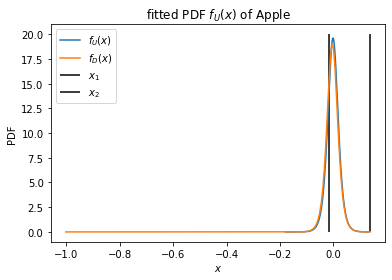

In [168]:
plt.plot(cdf_U_x, fU_FDFit, label="$f_U(x)$")
plt.plot(cdf_D_x, fD_FDFit, label="$f_D(x)$")
plt.vlines(cut_point_FD[0], 0, 20, label='$x_1$')
plt.vlines(cut_point_FD[1], 0, 20, label='$x_2$')
plt.title('fitted PDF $f_U(x)$ of Apple')
plt.ylabel('PDF')
plt.xlabel('$x$')
plt.legend()
# plt.savefig('FU(x) fitted')
plt.show()

In [130]:
def find_cut_point_Gaussian(args):
    x = args[0]
    return [
        (np.exp(-(x-mean_D)**2/(2*std_D**2))/np.sqrt(2*np.pi*std_D**2))/(np.exp(-(x-mean_U)**2/(2*std_U**2))/np.sqrt(2*np.pi*std_U**2)) - mu
    ]

In [152]:
cut_point_Gaussian = [optimize.fsolve(find_cut_point_Gaussian, [0.1])[0], optimize.fsolve(find_cut_point_Gaussian, [-0.1])[0]]

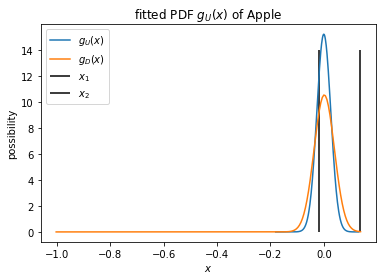

In [169]:
plt.plot(cdf_U_x, gU_GaussianFit, label="$g_U(x)$")
plt.plot(cdf_D_x, gD_GaussianFit, label="$g_D(x)$")
plt.vlines(cut_point_FD[1], 0, 14, label='$x_1$')
plt.vlines(cut_point_FD[0], 0, 14, label='$x_2$')
plt.title('fitted PDF $g_U(x)$ of Apple')
plt.ylabel('possibility')
plt.xlabel('$x$')
plt.legend()
# plt.savefig('fU(x) fitted.png')
plt.show()